In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import librosa
import librosa.display

##### Define all the functions

In [3]:
def plot_time_domain_waveform(audio, Fs, title, file_name, 
                              start_time=0):    
    t_wav = np.arange(audio.shape[0]) / Fs + start_time
    print ("Fs = %d, audio signal length = %d" % (Fs, audio.shape[0]))
    
    plt.plot(t_wav, audio, color='r')
    plt.xlim(t_wav[0], t_wav[-1])
    plt.title(title)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()

def plot_spectrum_magnitude(audio, Fs, n_fft, hop_length, win_length,
                            low_index, title, file_name):
    magnitudes = np.abs(librosa.stft(audio, 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    
    energy = sum(np.square(magnitudes[low_index:]))
    print(energy)
    
    freq = np.arange(n_fft/2 + 1) * Fs / n_fft
    plt.plot(freq, magnitudes, 'b')
    plt.xlim(freq[0], freq[-1])
    plt.title(title)
    plt.xlabel('Frequence (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
    print("mean = %f, std = %f" % (np.mean(magnitudes),
                                   np.std(magnitudes)))
        
def plot_energy_stft(audio_path, n_fft, hop_length, win_length,
                     low_index, title, file_name):
    audio = librosa.load(audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length, 
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(energy.shape)
    print(min(energy))
    
    time_frame = np.arange(len(energy))
    plt.plot(time_frame, energy, 'xr-')
    plt.xlim(time_frame[0], time_frame[-1])
    plt.title(title)
    plt.xlabel('Time frame', fontsize=12)
    plt.ylabel('Energy in high frequencies', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()

def plot_energy_stft_both(org_audio_path, adv_audio_path, n_fft,
                          hop_length, win_length, low_index, 
                          x_max, title, file_name):
    audio = librosa.load(org_audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(min(energy))
    time_frame = np.arange(len(energy))    
    plt.plot(time_frame, energy, 'xr:', label='Original audio')
    
    audio = librosa.load(adv_audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                     n_fft=n_fft, 
                                     hop_length=hop_length,
                                     win_length=win_length,
                                     center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(min(energy))
    time_frame = np.arange(len(energy))
    plt.plot(time_frame, energy, '+b-', label='Adversarial audio')
    
    plt.xlim(time_frame[0], x_max)
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('Time frame', fontsize=12)
    plt.ylabel('Energy in high frequencies', fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()


def plot_mel_spectrogram(audio, Fs, n_fft, hop_length, win_length,
                         n_mels, specmin, specmax, title, file_name):
    mel_spec = librosa.feature.melspectrogram(audio, 
                                              sr=Fs, 
                                              n_fft=n_fft, 
                                              hop_length=hop_length,
                                              win_length=win_length,
                                              n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec)
    librosa.display.specshow(log_mel_spec, x_axis='time',
                             y_axis='mel', sr=Fs,
                             hop_length=hop_length,
                             cmap='coolwarm',
                             vmin=specmin, vmax=specmax)
    
    plt.xlabel('Time (seconds)',fontsize=12)
    plt.ylabel('Frequency (Hz)',fontsize=12)
    
    cbar = plt.colorbar(format='%+2.f dB')
    cbar.set_label(label='Magnitude (dB)',size=12)
    cbar.ax.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    
    plt.savefig(file_name, dpi = 300)
    plt.show()
    
    plt.close()
    
def calculate_min_energy_stft(audio_path, n_fft, hop_length,
                              win_length, low_index) :
    audio = librosa.load(audio_path, sr=16000)
    magnitudes = np.abs(librosa.stft(audio[0], 
                                      n_fft=n_fft, 
                                      hop_length=hop_length,
                                      win_length=win_length,
                                      center=False))
    energy = sum(np.square(magnitudes[low_index:,]))
    print(energy)
    min_energy = min(energy)
    index_min_energy = min(range(len(energy)), 
                         key = energy.__getitem__)
    return min_energy, index_min_energy

##### Original Audio

In [6]:
original_audio_name = "cw2_original.wav"
IPython.display.Audio(original_audio_name)

##### Adversarial Audio

In [7]:
adversarial_audio_name = "cw2_adversarial.wav"
IPython.display.Audio(adversarial_audio_name)

##### Time domain Waveform of original audio

Fs = 16000, audio signal length = 78240


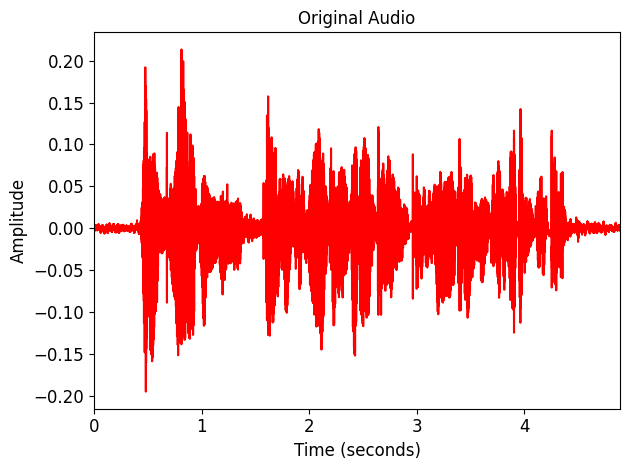

In [8]:
original_audio, fs = librosa.load(original_audio_name, sr=16000)
plot_time_domain_waveform(original_audio, fs, "Original Audio", "./time_waveform_cw2_original.png")

##### Time domain waveform of adversarial audio

Fs = 16000, audio signal length = 78240


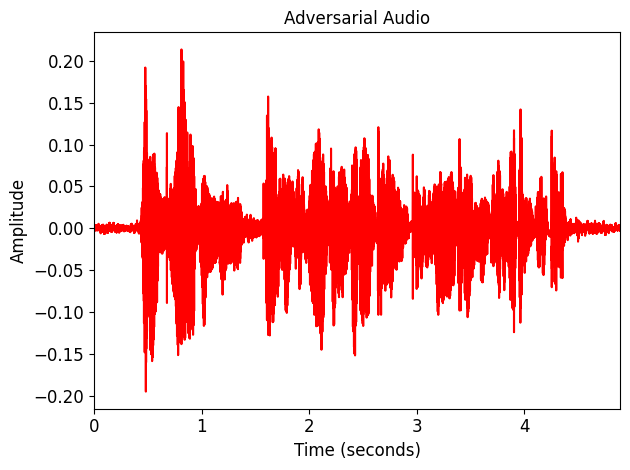

In [9]:
adversarial_audio, fs = librosa.load(adversarial_audio_name, sr=16000)
plot_time_domain_waveform(adversarial_audio, fs, "Adversarial Audio", "./time_waveform_cw2_adversarial.png")

##### Time domain waveform of the difference

Fs = 16000, audio signal length = 78240


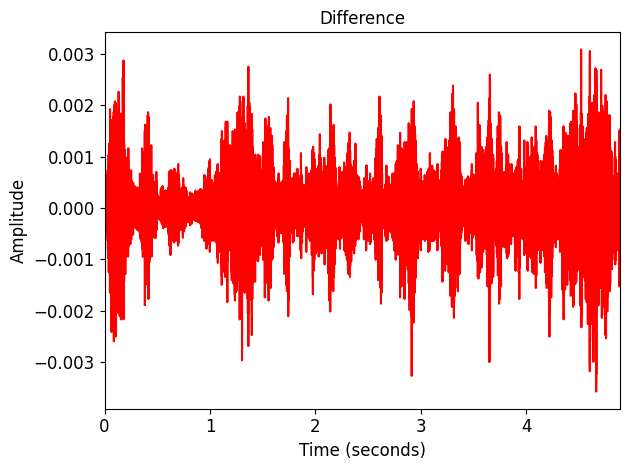

Mean = -7.492876648029778e-07, STD = 0.00042657030280679464


In [10]:
difference = adversarial_audio - original_audio
plot_time_domain_waveform(difference, fs, "Difference", "time_waveform_cw2_difference.png")
print(f"Mean = {np.mean(difference)}, STD = {np.std(difference)}")

##### Time domain waveform of the original audio in a very short time period

Fs = 16000, audio signal length = 512


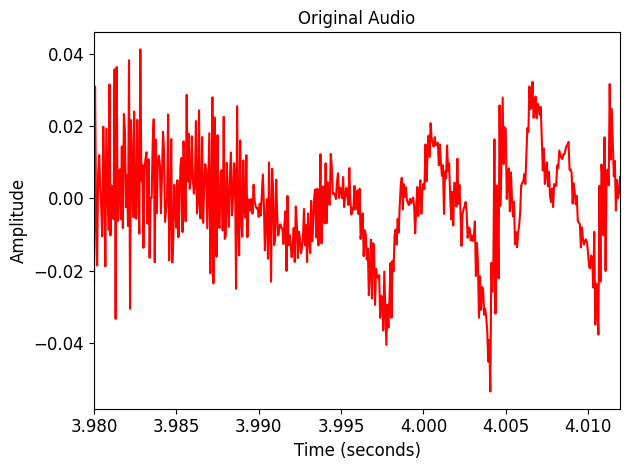

In [22]:
n_fft = 512
index = 398
hop_length = 160

org_audio_short_time = original_audio[hop_length * index : hop_length * index + n_fft]
plot_time_domain_waveform(org_audio_short_time, fs, "Original Audio", "./time_waveform_org_audio_short_time.png", hop_length * index / fs)

##### Time domain waveform of the adversarial audio in a very short time period

Fs = 16000, audio signal length = 512


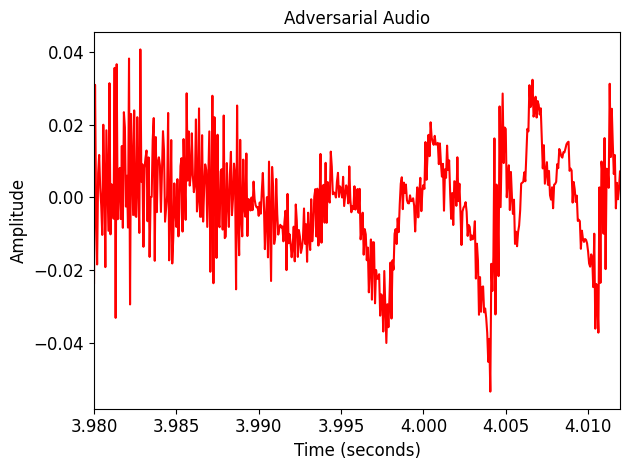

In [27]:
adv_audio_short_time = adversarial_audio[hop_length * index : hop_length * index + n_fft]
plot_time_domain_waveform(adv_audio_short_time, fs, "Adversarial Audio", "./time_waveform_adv_audio_short_time.png", hop_length * index / fs)

##### Time domain waveform of the difference in a short time period

Fs = 16000, audio signal length = 512


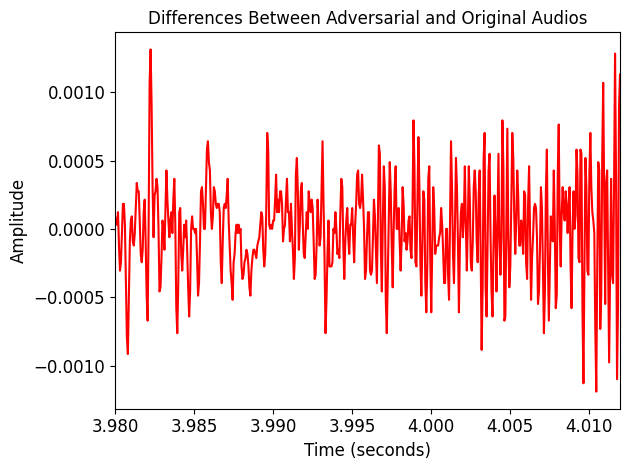

mean = 0.000001, std = 0.000352


In [29]:
difference_short_time = adv_audio_short_time - org_audio_short_time
plot_time_domain_waveform(difference_short_time, fs, "Differences Between Adversarial and Original Audios", "./time_waveform_differences_short_time.png", hop_length * index / fs)
print("mean = %f, std = %f" % (np.mean(difference_short_time), np.std(difference_short_time)))

##### Spectrum of original audio in short time

[0.08345084]


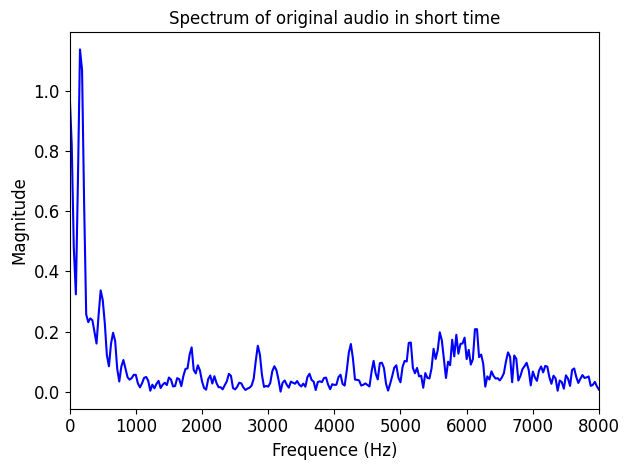

mean = 0.089314, std = 0.142784


In [30]:
plot_spectrum_magnitude(org_audio_short_time, Fs = 16000, n_fft = 512, hop_length = 512, win_length = 400, low_index = 224, title = "Spectrum of original audio in short time", file_name = "./spectrum_org_audio_short_time.png")

##### Spectrum of adversarial audio in short time

[0.08202053]


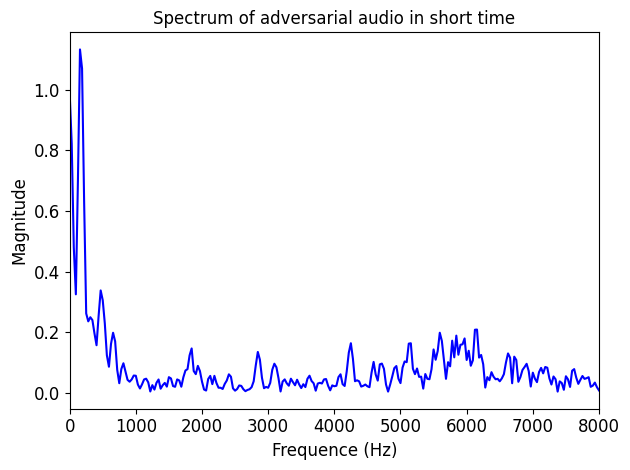

mean = 0.089321, std = 0.142562


In [31]:
plot_spectrum_magnitude(adv_audio_short_time, Fs=16000, n_fft = 512, hop_length = 512, win_length = 400, low_index = 224, title = "Spectrum of adversarial audio in short time", file_name = "./spectrum_adv_audio_short_time.png")

##### Spectrum of perturbations in short time

[3.0320882e-05]


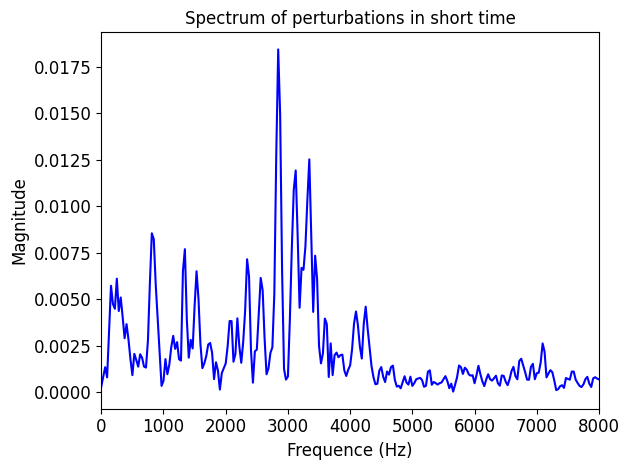

mean = 0.002330, std = 0.002651


In [32]:
plot_spectrum_magnitude(difference_short_time, Fs=16000, n_fft = 512, hop_length = 512, win_length = 400, low_index = 224, title = "Spectrum of perturbations in short time", file_name = "./spectrum_perturbation_audio_short_time.png")


##### Time domain waveforms of original and adversarial audio in another short time period

Fs = 16000, audio signal length = 512


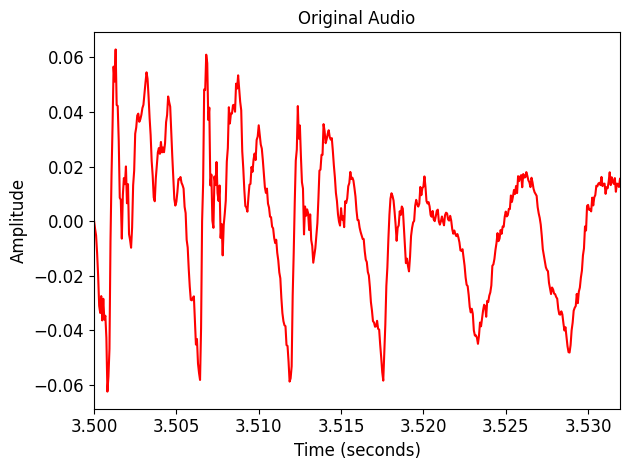

-0.062469482
0.062927246


In [33]:
n_fft = 512
index = 350
hop_length = 160

org_audio_short_time = original_audio[hop_length * index : hop_length * index + n_fft]
plot_time_domain_waveform(org_audio_short_time, fs, "Original Audio", "./time_waveform_org_audio_short_time_2.png", hop_length * index / fs)

print(min(org_audio_short_time))
print(max(org_audio_short_time))

Fs = 16000, audio signal length = 512


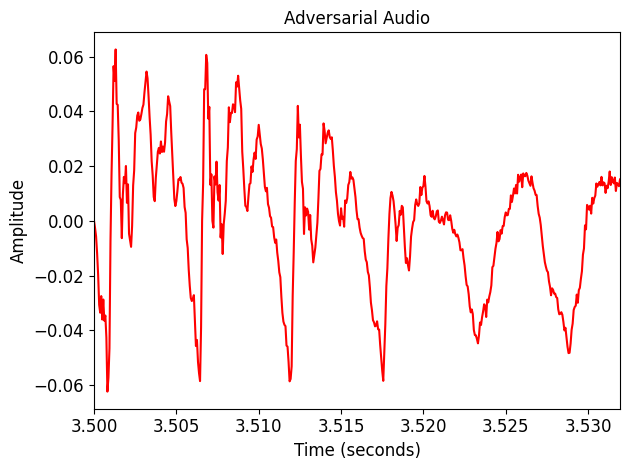

-0.062408447
0.06265259


In [34]:
adv_audio_short_time = adversarial_audio[hop_length * index : hop_length * index + n_fft]
plot_time_domain_waveform(adv_audio_short_time, fs, "Adversarial Audio", "./time_waveform_adv_audio_short_time_2.png", hop_length * index / fs)

print(min(adv_audio_short_time))
print(max(adv_audio_short_time))

Fs = 16000, audio signal length = 512


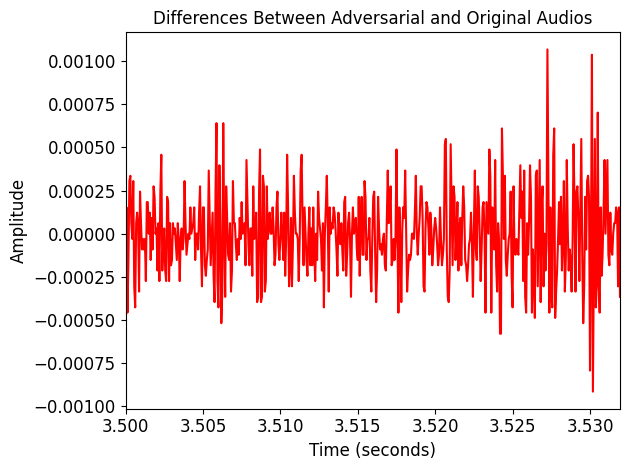

mean = -0.000005, std = 0.000246


In [35]:
difference_short_time = adv_audio_short_time - org_audio_short_time
plot_time_domain_waveform(difference_short_time, fs, "Differences Between Adversarial and Original Audios", "./time_waveform_differences_short_time_2.png", hop_length * index / fs)
print("mean = %f, std = %f" % (np.mean(difference_short_time), np.std(difference_short_time)))

##### High frequency energy for original audio

(486,)
0.00012835221


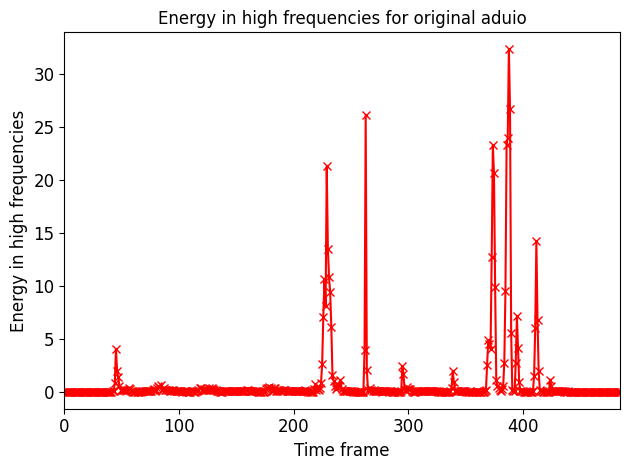

In [36]:
plot_energy_stft(original_audio_name, n_fft = 512, hop_length = 160, win_length = 400, low_index = 224, title = "Energy in high frequencies for original aduio", file_name = "./hf-stft_org_audio.png")

##### High frequency energy for adversarial audio

(486,)
0.00013381802


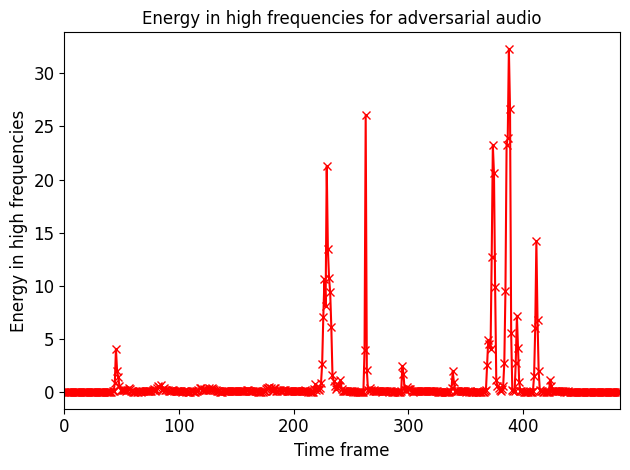

In [37]:
plot_energy_stft(adversarial_audio_name, n_fft = 512, hop_length = 160, win_length = 400, low_index = 224, title = "Energy in high frequencies for adversarial audio", file_name = "./hf-stft_adv_audio.png")

##### High frequency energy for both the audios

0.00012835221
0.00013381802


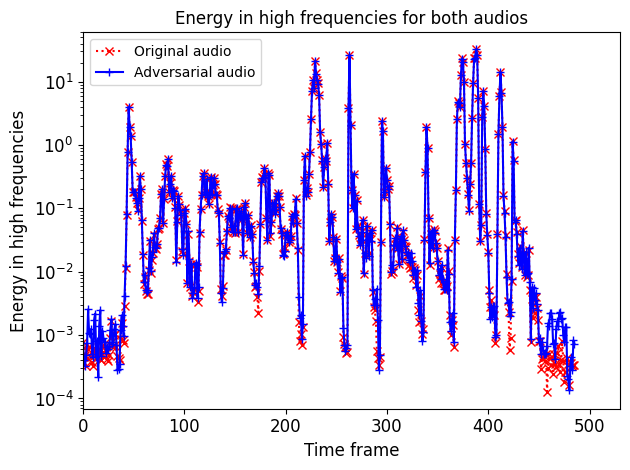

In [39]:
plot_energy_stft_both(original_audio_name, adversarial_audio_name, n_fft = 512, hop_length = 160, win_length = 400, low_index = 224, x_max = 530, title = "Energy in high frequencies for both audios", file_name = "./hf-stft_both.png")